In [1]:
import pandas as pd
import numpy as np
import folium
from ipyleaflet import Map, Polyline

import matplotlib.cm as cm
import matplotlib.colors as colors

import warnings
warnings.simplefilter("ignore", UserWarning)

from features.load_data import *
from features.part1 import *

In [2]:
# Load the traffic data CSV file into a pandas DataFrame
df_traffic = pd.read_csv('data/data/E-tmja-2019.csv', sep=";")
df_traffic

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,absF,cumulF,xF,yF,zF,anneeMesureTrafic,typeComptageTrafic,typeComptageTrafic_lib,TMJA,ratio_PL
0,01/01/2019,31D0044,44,0,31,N,0,0,"511656,78","6204078,36",...,44,44,"511698,51","6204063,93",0,NaN,NaN,NaN,NaN,NaN
1,01/01/2019,31D0044E,762,0,31,N,0,0,"511367,22","6204210,06",...,762,762,"511880,76","6203732,4",0,NaN,NaN,NaN,NaN,NaN
2,01/01/2019,69D0301,6055,2,69,N,-981,0,"844036,84","6510806,45",...,71,6055,"849346,89","6509342,34",0,NaN,NaN,NaN,NaN,NaN
3,01/01/2019,69D0383,13752,4,69,N,-494,0,"846831,3","6522372,16",...,544,13752,"843537,87","6512429,8",0,NaN,NaN,NaN,NaN,NaN
4,01/01/2019,69D0383BPNL,2408,0,69,N,0,0,"844982,46","6522772,27",...,413,2408,"846831,3","6522372,16",0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,01/01/2019,N1338,2060,8,76,N,0,0,"560104,39","6927892,82",...,960,2060,"559383,28","6929517,35",0,0.0,NaN,NaN,NaN,NaN
4691,01/01/2019,P0224,8995,211,31,N,-638,0,"555988,61","6288880,3",...,344,8995,"562812,02","6287175,9",0,NaN,NaN,NaN,NaN,NaN
4692,01/01/2019,P0524,1777,31,33,N,-768,0,"440252,1","6361052,92",...,1009,1777,"440343,36","6359374,43",0,NaN,NaN,NaN,NaN,NaN
4693,01/01/2019,P0524,3860,31,33,N,1009,1777,"458798,85","6325912,32",...,568,5637,"458785,94","6322872,51",0,NaN,NaN,NaN,NaN,NaN


In [3]:
#Load regional data from insee.fr
df_route = distance_road_region("data/TCRD_076.xlsx")
df_route

,Région,Autoroutes,Routes nationales,Routes_tot
0,Auvergne-Rhône-Alpes,1698,1100,2798
1,Bourgogne-Franche-Comté,901,773,1674
2,Bretagne,50,1009,1059
3,Centre-Val de Loire,980,342,1322
4,Corse,0,0,0
5,Grand Est,1305,935,2240
6,Hauts-de-France,1179,567,1746
7,Île-de-France,620,489,1109
8,Normandie,728,570,1298
9,Nouvelle-Aquitaine,1465,1284,2749


In [4]:
df_traffic.columns

Index(['dateReferentiel', 'route', 'longueur', 'prD', 'depPrD',
       'concessionPrD', 'absD', 'cumulD', 'xD', 'yD', 'zD', 'prF', 'depPrF',
       'concessionPrF', 'absF', 'cumulF', 'xF', 'yF', 'zF',
       'anneeMesureTrafic', 'typeComptageTrafic', 'typeComptageTrafic_lib',
       'TMJA', 'ratio_PL'],
      dtype='object')

In [5]:
df_traffic = preprocess_data(df_traffic)
df_traffic

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,xF,yF,zF,anneeMesureTrafic,typeComptageTrafic,typeComptageTrafic_lib,TMJA,ratio_PL,TMJA_PL,percentage_traffic
0,01/01/2019,31D0044,44.0,0,31,N,0,0,"511656,78","6204078,36",...,"511698,51","6204063,93",0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,01/01/2019,31D0044E,762.0,0,31,N,0,0,"511367,22","6204210,06",...,"511880,76","6203732,4",0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,01/01/2019,69D0301,6055.0,2,69,N,-981,0,"844036,84","6510806,45",...,"849346,89","6509342,34",0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,01/01/2019,69D0383,13752.0,4,69,N,-494,0,"846831,3","6522372,16",...,"843537,87","6512429,8",0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,01/01/2019,69D0383BPNL,2408.0,0,69,N,0,0,"844982,46","6522772,27",...,"846831,3","6522372,16",0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,01/01/2019,N1338,2060.0,8,76,N,0,0,"560104,39","6927892,82",...,"559383,28","6929517,35",0,0.0,NaN,NaN,NaN,0.0,NaN,NaN
4691,01/01/2019,P0224,8995.0,211,31,N,-638,0,"555988,61","6288880,3",...,"562812,02","6287175,9",0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4692,01/01/2019,P0524,1777.0,31,33,N,-768,0,"440252,1","6361052,92",...,"440343,36","6359374,43",0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4693,01/01/2019,P0524,3860.0,31,33,N,1009,1777,"458798,85","6325912,32",...,"458785,94","6322872,51",0,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [28]:
# create a Boolean mask indicating which elements of the 'TMJA_PL' column are not NaN
mask = df_traffic['TMJA_PL'].notna()

# create a sub DataFrame where 'TMJA_PL' is not NaN
sub_df_traffic = df_traffic[mask]

# print the sub DataFrame
sub_df_traffic


,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,typeComptageTrafic_lib,TMJA,ratio_PL,TMJA_PL,percentage_traffic,lonD,latD,lonF,latF,region
7,01/01/2019,A0001,2440.0,0,93,N,0,0,653006.6,6867037.55,...,Permanent horaire,132186.0,0.0,0.00,0.0,2.358973,48.901624,2.357188,48.923638,Île-de-France
8,01/01/2019,A0001,785.2,2,93,N,460,2440,652895.68,6869486.5,...,Permanent horaire,132186.0,0.0,0.00,0.0,2.357188,48.923638,2.361177,48.929182,Île-de-France
9,01/01/2019,A0001,401.8,3,93,N,"248,2","3225,2",653192.95,6870100.7,...,Permanent horaire,132186.0,0.0,0.00,0.0,2.361177,48.929182,2.366318,48.930477,Île-de-France
10,01/01/2019,A0001,820.5,3,93,N,650,3627,653570.77,6870241.67,...,Permanent horaire,132186.0,0.0,0.00,0.0,2.366318,48.930477,2.376701,48.933068,Île-de-France
11,01/01/2019,A0001,229.5,4,93,N,"460,5","4447,5",654333.83,6870523.68,...,Permanent horaire,132186.0,0.0,0.00,0.0,2.376701,48.933068,2.379703,48.933518,Île-de-France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4683,01/01/2019,N1135,236.0,0,55,N,290,290,859802.47,6854546.43,...,Permanent horaire,6077.0,10.5,638.08,0.0,5.174636,48.771211,5.176909,48.769725,Grand Est
4684,01/01/2019,N1135,854.0,0,55,N,526,526,859974.01,6854385.94,...,Permanent horaire,6077.0,10.5,638.08,0.0,5.176909,48.769725,5.184007,48.763751,Grand Est
4685,01/01/2019,N1135,4497.0,1,55,N,380,1380,860513.86,6853736.35,...,Permanent horaire,6077.0,10.5,638.08,0.0,5.184007,48.763751,5.220748,48.737012,Grand Est
4688,01/01/2019,N1154,3457.0,0,28,N,0,0,586956.13,6822750.3,...,Permanent horaire,17958.0,14.3,2567.99,0.0,1.469858,48.495149,1.465087,48.467603,Centre-Val de Loire


In [29]:
# Calculate the sum of the Avg TMJA_PL column
tmja_sum = sub_df_traffic['TMJA_PL'].sum()
tmja_sum

12388095.68

In [30]:
# Calculate the percentage of traffic in each region
sub_df_traffic['percentage_traffic'] = sub_df_traffic['TMJA_PL'] / tmja_sum
sub_df_traffic

C:\Temp\ipykernel_20092\1513623638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_traffic['percentage_traffic'] = sub_df_traffic['TMJA_PL'] / tmja_sum


,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,typeComptageTrafic_lib,TMJA,ratio_PL,TMJA_PL,percentage_traffic,lonD,latD,lonF,latF,region
7,01/01/2019,A0001,2440.0,0,93,N,0,0,653006.6,6867037.55,...,Permanent horaire,132186.0,0.0,0.00,0.000000,2.358973,48.901624,2.357188,48.923638,Île-de-France
8,01/01/2019,A0001,785.2,2,93,N,460,2440,652895.68,6869486.5,...,Permanent horaire,132186.0,0.0,0.00,0.000000,2.357188,48.923638,2.361177,48.929182,Île-de-France
9,01/01/2019,A0001,401.8,3,93,N,"248,2","3225,2",653192.95,6870100.7,...,Permanent horaire,132186.0,0.0,0.00,0.000000,2.361177,48.929182,2.366318,48.930477,Île-de-France
10,01/01/2019,A0001,820.5,3,93,N,650,3627,653570.77,6870241.67,...,Permanent horaire,132186.0,0.0,0.00,0.000000,2.366318,48.930477,2.376701,48.933068,Île-de-France
11,01/01/2019,A0001,229.5,4,93,N,"460,5","4447,5",654333.83,6870523.68,...,Permanent horaire,132186.0,0.0,0.00,0.000000,2.376701,48.933068,2.379703,48.933518,Île-de-France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4683,01/01/2019,N1135,236.0,0,55,N,290,290,859802.47,6854546.43,...,Permanent horaire,6077.0,10.5,638.08,0.000052,5.174636,48.771211,5.176909,48.769725,Grand Est
4684,01/01/2019,N1135,854.0,0,55,N,526,526,859974.01,6854385.94,...,Permanent horaire,6077.0,10.5,638.08,0.000052,5.176909,48.769725,5.184007,48.763751,Grand Est
4685,01/01/2019,N1135,4497.0,1,55,N,380,1380,860513.86,6853736.35,...,Permanent horaire,6077.0,10.5,638.08,0.000052,5.184007,48.763751,5.220748,48.737012,Grand Est
4688,01/01/2019,N1154,3457.0,0,28,N,0,0,586956.13,6822750.3,...,Permanent horaire,17958.0,14.3,2567.99,0.000207,1.469858,48.495149,1.465087,48.467603,Centre-Val de Loire


In [32]:
sub_df_traffic['percentage_traffic'].sum()

1.0

In [6]:
df_traffic[df_traffic['ratio_PL']>40].head()

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,xF,yF,zF,anneeMesureTrafic,typeComptageTrafic,typeComptageTrafic_lib,TMJA,ratio_PL,TMJA_PL,percentage_traffic
1806,01/01/2019,A0620,2950.0,0,31,C,724,724,"572622,79","6284337,71",...,"572259,12","6281544,9",0,2019.0,1.0,Permanent horaire,131435.0,64.7,85038.44,0.01
1810,01/01/2019,A0621,3990.0,0,31,N,0,0,"572394,24","6281800,18",...,"569218,02","6282835,05",0,2019.0,1.0,Permanent horaire,105254.0,90.1,94833.85,0.01
1814,01/01/2019,A0624,2400.0,1,31,N,500,1683,"569611,81","6280353,91",...,"567272,24","6280268,79",0,2019.0,1.0,Permanent horaire,121778.0,98.9,120438.44,0.01
2002,01/01/2019,N0004,1215.0,41,51,N,538,109111,"773589,31","6850621,31",...,"774762,42","6850676,08",0,2019.0,1.0,Permanent horaire,7486.0,48.8,3653.17,0.00
2003,01/01/2019,N0004,9456.0,42,51,N,750,110326,"774762,42","6850676,08",...,"784124,01","6849441,92",0,2019.0,1.0,Permanent horaire,7486.0,48.8,3653.17,0.00


In [7]:
data = add_lat_lon_columns(df_traffic)
data

C:\Users\chach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\chach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\chach\OneDrive - HE

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,typeComptageTrafic,typeComptageTrafic_lib,TMJA,ratio_PL,TMJA_PL,percentage_traffic,lonD,latD,lonF,latF
0,01/01/2019,31D0044,44.0,0,31,N,0,0,511656.78,6204078.36,...,NaN,NaN,NaN,0.0,NaN,NaN,0.695459,42.911382,0.695975,42.911263
1,01/01/2019,31D0044E,762.0,0,31,N,0,0,511367.22,6204210.06,...,NaN,NaN,NaN,0.0,NaN,NaN,0.691871,42.912490,0.698322,42.908331
2,01/01/2019,69D0301,6055.0,2,69,N,-981,0,844036.84,6510806.45,...,NaN,NaN,NaN,0.0,NaN,NaN,4.850575,45.681629,4.918315,45.667307
3,01/01/2019,69D0383,13752.0,4,69,N,-494,0,846831.3,6522372.16,...,NaN,NaN,NaN,0.0,NaN,NaN,4.890020,45.785151,4.844653,45.696348
4,01/01/2019,69D0383BPNL,2408.0,0,69,N,0,0,844982.46,6522772.27,...,NaN,NaN,NaN,0.0,NaN,NaN,4.866352,45.789149,4.890020,45.785151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,01/01/2019,N1338,2060.0,8,76,N,0,0,560104.39,6927892.82,...,NaN,NaN,NaN,0.0,NaN,NaN,1.071779,49.435101,1.061294,49.449539
4691,01/01/2019,P0224,8995.0,211,31,N,-638,0,555988.61,6288880.3,...,NaN,NaN,NaN,0.0,NaN,NaN,1.214224,43.684301,1.299264,43.670324
4692,01/01/2019,P0524,1777.0,31,33,N,-768,0,440252.1,6361052.92,...,NaN,NaN,NaN,0.0,NaN,NaN,-0.256575,44.300286,-0.254565,44.285224
4693,01/01/2019,P0524,3860.0,31,33,N,1009,1777,458798.85,6325912.32,...,NaN,NaN,NaN,0.0,NaN,NaN,-0.007509,43.990867,-0.006227,43.963525


In [8]:
data['dateReferentiel'].min()

'01/01/2019'

In [9]:
data['dateReferentiel'].max()

'01/01/2019'

In [10]:
len(data['route'].unique())

323

In [21]:
# create a map centered on France
m = Map(center=(46.5, 2), zoom=6)

# create a polyline for each road based on its start and end coordinates
for idx, row in data.iterrows():
    # get the start and end latitude/longitude coordinates
    start_lat, start_lon = row['latD'], row['lonD']
    end_lat, end_lon = row['latF'], row['lonF']
    
    # create a polyline and add it to the map
    line = Polyline(locations=[(start_lat, start_lon), (end_lat, end_lon)], color='blue', weight=3)
    m.add_layer(line)

# display the map
m


Map(center=[46.5, 2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

In [47]:
sub_df_region = add_lat_lon_columns(sub_df_traffic)

# create a color map that goes from blue to red
color_map = cm.ScalarMappable(cmap='coolwarm').to_rgba(sub_df_region['percentage_traffic'])
# convert the color map to a list of HTML color strings
color_list = [colors.to_hex(c) for c in color_map]

sub_df_region['color_map'] = color_list
sub_df_region.head()

C:\Users\chach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\chach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\chach\OneDrive - HE

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,TMJA,ratio_PL,TMJA_PL,percentage_traffic,lonD,latD,lonF,latF,region,color_map
7,01/01/2019,A0001,2440.0,0,93,N,0,0,653006.6,6867037.55,...,132186.0,0.0,0.0,0.0,2.358973,48.901624,2.357188,48.923638,Île-de-France,#3b4cc0
8,01/01/2019,A0001,785.2,2,93,N,460,2440,652895.68,6869486.5,...,132186.0,0.0,0.0,0.0,2.357188,48.923638,2.361177,48.929182,Île-de-France,#3b4cc0
9,01/01/2019,A0001,401.8,3,93,N,"248,2","3225,2",653192.95,6870100.7,...,132186.0,0.0,0.0,0.0,2.361177,48.929182,2.366318,48.930477,Île-de-France,#3b4cc0
10,01/01/2019,A0001,820.5,3,93,N,650,3627,653570.77,6870241.67,...,132186.0,0.0,0.0,0.0,2.366318,48.930477,2.376701,48.933068,Île-de-France,#3b4cc0
11,01/01/2019,A0001,229.5,4,93,N,"460,5","4447,5",654333.83,6870523.68,...,132186.0,0.0,0.0,0.0,2.376701,48.933068,2.379703,48.933518,Île-de-France,#3b4cc0


In [48]:
# Add traffic coloring 
# create a color map that goes from blue to red
color_map = cm.ScalarMappable(cmap='coolwarm').to_rgba(sub_df_region['percentage_traffic'])
# convert the color map to a list of HTML color strings
color_list = [colors.to_hex(c) for c in color_map]


# create a map centered on France
m = Map(center=(46.5, 2), zoom=6)

# create a polyline for each road based on its start and end coordinates
for idx, row in sub_df_region.iterrows():
    # get the start and end latitude/longitude coordinates
    start_lat, start_lon = row['latD'], row['lonD']
    end_lat, end_lon = row['latF'], row['lonF']
    
    # get the percentage_traffic value for the road
    pct_traffic = row['percentage_traffic']

    # create a polyline and add it to the map
    line = Polyline(locations=[(start_lat, start_lon), (end_lat, end_lon)], color=row['color_map'], weight=3)
    m.add_layer(line)

# display the map
m


Map(center=[46.5, 2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

### Analyse par region

In [11]:
data_r = add_region_column(data)
data_r.head()

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,typeComptageTrafic_lib,TMJA,ratio_PL,TMJA_PL,percentage_traffic,lonD,latD,lonF,latF,region
0,01/01/2019,31D0044,44.0,0,31,N,0,0,511656.78,6204078.36,...,NaN,NaN,0.0,NaN,NaN,0.695459,42.911382,0.695975,42.911263,Occitanie
1,01/01/2019,31D0044E,762.0,0,31,N,0,0,511367.22,6204210.06,...,NaN,NaN,0.0,NaN,NaN,0.691871,42.912490,0.698322,42.908331,Occitanie
2,01/01/2019,69D0301,6055.0,2,69,N,-981,0,844036.84,6510806.45,...,NaN,NaN,0.0,NaN,NaN,4.850575,45.681629,4.918315,45.667307,Auvergne-Rhône-Alpes
3,01/01/2019,69D0383,13752.0,4,69,N,-494,0,846831.3,6522372.16,...,NaN,NaN,0.0,NaN,NaN,4.890020,45.785151,4.844653,45.696348,Auvergne-Rhône-Alpes
4,01/01/2019,69D0383BPNL,2408.0,0,69,N,0,0,844982.46,6522772.27,...,NaN,NaN,0.0,NaN,NaN,4.866352,45.789149,4.890020,45.785151,Auvergne-Rhône-Alpes


In [12]:
region_data = grouped_region(data_r, 'regions-20180101-shp/regions-20180101.shp')
region_data

,surf_km2,geometry,region,longueur (K km),Avg TMJA_PL,density_road (K km/km2)
0,12.069,"POLYGON ((1.44624 49.04639, 1.44945 49.04765, ...",Île-de-France,1236.953,4397.47,14928.79
1,31.935,"MULTIPOLYGON (((1.37983 50.06518, 1.38000 50.0...",Hauts-de-France,1706.436,5038.22,54495.03
2,84.747,"MULTIPOLYGON (((-1.79102 43.37292, -1.79048 43...",Nouvelle-Aquitaine,2420.721,3527.31,205148.84
3,30.139,"MULTIPOLYGON (((-1.94877 49.71649, -1.94836 49...",Normandie,1239.708,2199.38,37363.56
4,32.430,"MULTIPOLYGON (((-2.55966 47.37430, -2.55941 47...",Pays de la Loire,1201.228,3661.13,38955.82
5,39.530,"POLYGON ((0.05272 47.19656, 0.05321 47.19721, ...",Centre-Val de Loire,1136.256,2769.26,44916.20
6,57.725,"POLYGON ((3.38364 48.47958, 3.38370 48.47963, ...",Grand Est,1792.295,3725.08,103460.23
7,31.840,"MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4...",Provence-Alpes-Côte d'Azur,1005.628,1646.66,32019.20
8,27.498,"MULTIPOLYGON (((-4.79551 48.41438, -4.79551 48...",Bretagne,1064.210,4283.72,29263.65
9,48.059,"POLYGON ((2.84448 47.54488, 2.84596 47.54546, ...",Bourgogne-Franche-Comté,1454.906,2518.67,69921.33


### Road Density & Traffic

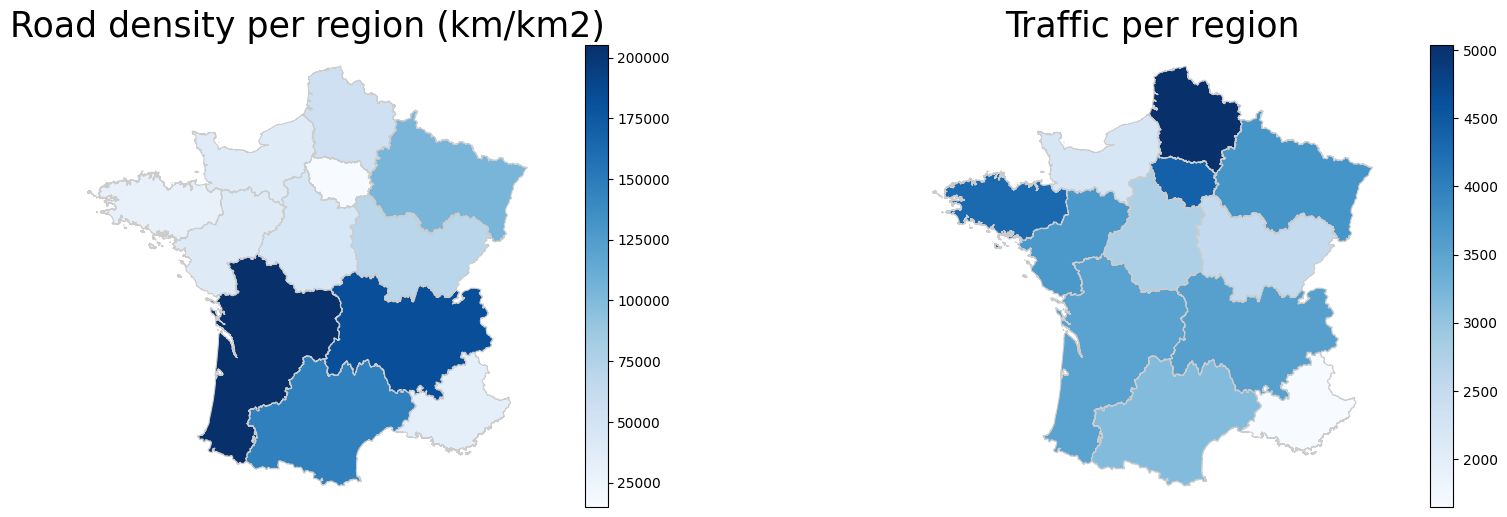

In [13]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot the road density on the left subplot
axs[0].axis('off')
axs[0].set_title('Road density per region (km/km2)', fontdict={'fontsize': '25', 'fontweight' : '3'})
region_data.plot(column='density_road (K km/km2)', cmap='Blues', linewidth=0.8, ax=axs[0], edgecolor='0.8', legend=True)

# Plot the traffic on the right subplot
axs[1].axis('off')
axs[1].set_title('Traffic per region', fontdict={'fontsize': '25', 'fontweight' : '3'})
region_data.plot(column='Avg TMJA_PL', cmap='Blues', linewidth=0.8, ax=axs[1], edgecolor='0.8', legend=True)

# Show the plot
plt.show()


## Road Total Distance per region

## Strategy

To calculate the number of trucks needed in each region for each scenario, we need to make some assumptions regarding the following factors:

- Average daily driving time for a truck driver
- Number of working days in a week
- Average truck speed
- Number of refueling stops per day
- Refueling time per stop

In [14]:
#load data 

df_route_traffic = create_part1_data("data/TCRD_076.xlsx", region_data)
df_route_traffic

,Région,Autoroutes,Routes nationales,Routes_tot,Avg TMJA_PL,percentage_traffic
0,Auvergne-Rhône-Alpes,1698,1100,2798,3547.54,0.09
1,Bourgogne-Franche-Comté,901,773,1674,2518.67,0.06
2,Bretagne,50,1009,1059,4283.72,0.11
3,Centre-Val de Loire,980,342,1322,2769.26,0.07
4,Grand Est,1305,935,2240,3725.08,0.09
5,Hauts-de-France,1179,567,1746,5038.22,0.12
6,Île-de-France,620,489,1109,4397.47,0.11
7,Normandie,728,570,1298,2199.38,0.05
8,Nouvelle-Aquitaine,1465,1284,2749,3527.31,0.09
9,Occitanie,1242,1107,2349,3148.00,0.08


In [15]:
# Calculate the number of H2 Stations needed per region

stations = calculate_hydrogen_stations(df_route_traffic, 0.25, 0.25, 0.5, 2030)
stations = stations.sort_values(by='Hydrogen Stations Needed', ascending = False)
stations

,Region,Hydrogen Stations Needed
5,Hauts-de-France,45
2,Bretagne,41
6,Île-de-France,41
0,Auvergne-Rhône-Alpes,34
4,Grand Est,34
8,Nouvelle-Aquitaine,34
10,Pays de la Loire,34
9,Occitanie,30
3,Centre-Val de Loire,26
1,Bourgogne-Franche-Comté,23


In [16]:
stations['Hydrogen Stations Needed'].sum()

376

In [17]:
# Calculate the number of H2 Stations needed per region

stations40 = calculate_hydrogen_stations(df_route_traffic, 0.25, 0.25, 0.5, 2040)
stations40 = stations40.sort_values(by='Hydrogen Stations Needed', ascending = False)
stations40

,Region,Hydrogen Stations Needed
5,Hauts-de-France,267
2,Bretagne,245
6,Île-de-France,245
0,Auvergne-Rhône-Alpes,200
4,Grand Est,200
8,Nouvelle-Aquitaine,200
10,Pays de la Loire,200
9,Occitanie,178
3,Centre-Val de Loire,156
1,Bourgogne-Franche-Comté,134


In [18]:
stations40['Hydrogen Stations Needed'].sum()

2225

#### Ile de France Deep Dive

In [28]:
avg_speed = 80  # km/h
max_drive_time_daily = 9  # hours
break_time = 0.33 # hours
autonomy_daimler = 1000  # km
autonomy_nikola = 400  # km
autonomy_daf = 150  # km
tank_size_daimler = 80
tank_size_nikola = 32
tank_size_daf = 30
capacity_stations = 3*1000

total_trucks = 10000
daimler_perc = 0.25
nikola_perc = 0.25
daf_perc = 0.50

In [29]:
num_daimler_trucks = int(total_trucks * daimler_perc)
num_nikola_trucks = int(total_trucks * nikola_perc)
num_daf_trucks = int(total_trucks * daf_perc)

In [31]:
max_daily_distance = avg_speed * max_drive_time_daily
max_daily_distance

720

In [32]:
# Calculate the number of stops per day for each truck
daimler_num_stops_per_day = math.ceil(max_daily_distance / autonomy_daimler)
nikola_num_stops_per_day = math.ceil(max_daily_distance / autonomy_nikola)
daf_num_stops_per_day = math.ceil(max_daily_distance / autonomy_daf)

In [35]:
nikola_num_stops_per_day

2

In [36]:
# Calculate the total time for each truck to cover the region
total_time = 1109 / avg_speed

# Calculate the working time for each truck, including breaks and recharge times
dailmer_working_time = total_time + (daimler_num_stops_per_day * break_time)
nikola_working_time = total_time + (nikola_num_stops_per_day * break_time)
daf_working_time = total_time + (daf_num_stops_per_day * break_time)

In [39]:
nikola_working_time

14.5225

In [40]:
# Calculate the number of days each truck needs to cover the region
dailmer_day_region = math.ceil(dailmer_working_time / max_drive_time_daily)
nikola_day_region = math.ceil(nikola_working_time / max_drive_time_daily)
daf_day_region = math.ceil(daf_working_time / max_drive_time_daily)
        

In [43]:
daf_day_region

2

In [46]:
# Calculate the total hydrogen consumption for each truck in each region
hydrogen_dailmer = daimler_num_stops_per_day * tank_size_daimler * (num_daimler_trucks * 0.11)
hydrogen_nikola = nikola_num_stops_per_day * tank_size_nikola * (num_nikola_trucks * 0.11)
hydrogen_daf = daf_num_stops_per_day * tank_size_daf * (num_daf_trucks * 0.11)

In [51]:
#total hydrogen needed daily
total_hydrogen = hydrogen_dailmer + hydrogen_nikola + hydrogen_daf
total_hydrogen

122100.0

In [52]:
stations = total_hydrogen / capacity_stations
stations

40.7